In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Dataset .csv")

In [2]:
df#Check if data is imported

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
#check null values
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
print(df.isnull().values.any())

True


In [11]:
#Replace null values as unknown
df['Cuisines'].fillna('unknown',inplace=True)

C:\Users\Saran\AppData\Local\Temp\ipykernel_20200\924201150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('unknown',inplace=True)


In [13]:
#Re-check for null values
print(df.isnull().values.any())

False


In [15]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [17]:
#drop columns in dataset
drop_columns = ['Restaurant ID', 'Restaurant Name' , 'Address' , 'Locality' , 'Locality Verbose' , 'Rating color']
df.drop(columns=drop_columns, inplace=True)

In [19]:
#preprocess data
label_encoder = LabelEncoder()

In [21]:
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])

In [23]:
categorical_features = ['City','Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']
df_encoded = pd.get_dummies(df,columns=categorical_features,drop_first=True)

In [25]:
df_encoded.head()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,City_Agra,City_Ahmedabad,...,Currency_Indonesian Rupiah(IDR),Currency_NewZealand($),Currency_Pounds(��),Currency_Qatari Rial(QR),Currency_Rand(R),Currency_Sri Lankan Rupee(LKR),Currency_Turkish Lira(TL),Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
0,162,121.027535,14.565443,1100,3,4.8,1,314,False,False,...,False,False,False,False,False,False,False,True,False,False
1,162,121.014101,14.553708,1200,3,4.5,1,591,False,False,...,False,False,False,False,False,False,False,True,False,False
2,162,121.056831,14.581404,4000,4,4.4,5,270,False,False,...,False,False,False,False,False,False,False,True,False,False
3,162,121.056475,14.585318,1500,4,4.9,1,365,False,False,...,False,False,False,False,False,False,False,False,False,False
4,162,121.057508,14.584450,1500,4,4.8,1,229,False,False,...,False,False,False,False,False,False,False,True,False,False


In [27]:
#LinearRegression Training data and Testing data
X = df_encoded.drop(columns=['Aggregate rating'])
Y = df_encoded['Aggregate rating']

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [32]:
Y_pred = lr_model.predict(X_test)

In [33]:
#Model Evaluation
mse=mean_squared_error(Y_test,Y_pred)
rmse=mse**0.5
r2=r2_score(Y_test,Y_test)

In [34]:
feature_importance = pd.Series(lr_model.coef_,index = X.columns).sort_values(ascending=False)

In [35]:
rmse,r2,feature_importance.head(10)

(1.2958996799249762,
 1.0,
 Cuisines_Healthy Food, North Indian, Continental                  4.835971
 Cuisines_Cafe, Italian, Continental, Mexican                      4.680455
 Cuisines_North Indian, Chinese, Italian, Street Food, Desserts    4.566681
 Cuisines_Continental, North Indian, Chinese, Mughlai, Asian       4.544383
 Cuisines_American, Fast Food, Desserts                            4.468957
 Cuisines_Bakery, Desserts, Fast Food, Beverages                   4.462055
 Cuisines_Beverages, Salad                                         4.409829
 Cuisines_Cafe, Italian, Bakery                                    4.294735
 Cuisines_Asian, Seafood                                           4.293669
 Cuisines_Cafe, North Indian                                       4.262754
 dtype: float64)

C:\Users\Saran\AppData\Local\Temp\ipykernel_20200\2442784035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.head(10),y = feature_importance.head(10).index,palette="magma")


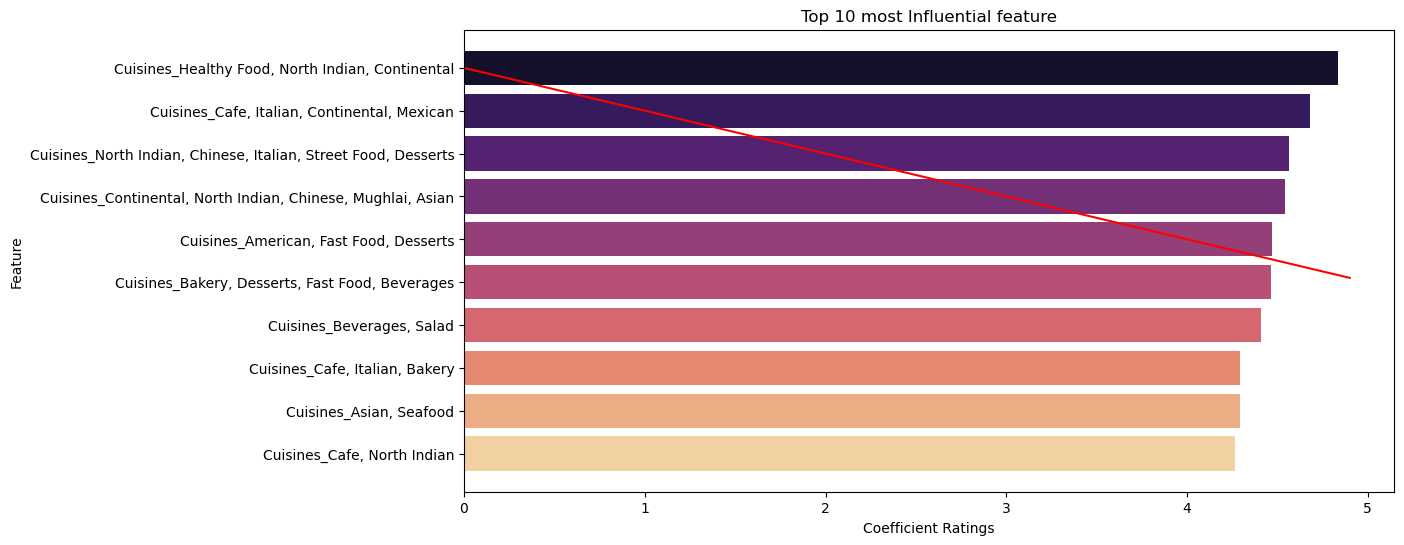

In [36]:
#data visualization
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance.head(10),y = feature_importance.head(10).index,palette="magma")
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color="red")
plt.xlabel("Coefficient Ratings")
plt.ylabel("Feature")
plt.title("Top 10 most Influential feature")
plt.show()

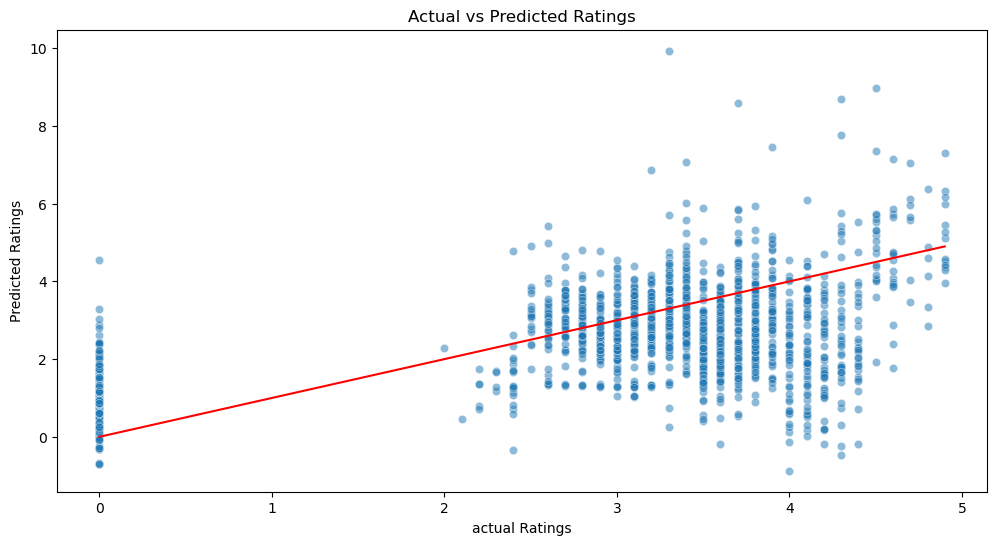

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=Y_test, y=Y_pred,alpha=0.5)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color="red")
plt.xlabel("actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()